# Natural Language Processing (NLP)

# NLP model with ML on spam1 dataset

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 
import math

In [2]:
messages= pd.read_csv(r"D:\Python\Python data set lec\NLP\spam1.csv" , encoding='cp1252')     

In [3]:
messages.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [4]:
messages.shape

(6776, 5)

# To check the null values

In [5]:
messages.isnull().sum()

v1               0
v2               0
Unnamed: 2    6720
Unnamed: 3    6760
Unnamed: 4    6768
dtype: int64

# Select only required features

In [6]:
messages = messages.iloc[: , [0,1]]

In [7]:
messages.head()

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


# Rename the columns

In [8]:
messages.rename(columns={ 'v1' : 'label' , 'v2' : 'message' } , inplace=True)

In [9]:
messages.head()

,label,message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [10]:
messages.label.value_counts()

ham     5854
spam     922
Name: label, dtype: int64

# convert the target feature into numeric 

In [11]:
messages.label.replace({'ham' : 0 , 'spam' : 1} , inplace=True)

In [12]:
messages.label.value_counts()

0    5854
1     922
Name: label, dtype: int64

# Process the Data

# Convert all upper string case into lower string case 

In [14]:
messages.message = messages.message.str.lower()  # convert into lower case 

In [15]:
messages.head()

,label,message
0,0,"go until jurong point, crazy.. available only ..."
1,0,ok lar... joking wif u oni...
2,1,free entry in 2 a wkly comp to win fa cup fina...
3,0,u dun say so early hor... u c already then say...
4,0,"nah i don't think he goes to usf, he lives aro..."


# Remove the stopwords & punctuation marks by using user-defined function

In [16]:
from nltk.corpus import stopwords

#import nltk

#nltk.download('stopwords')

In [17]:
stopwords.words('english')

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [18]:
len(stopwords.words('english'))

179

In [19]:
import string

In [20]:
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [21]:
# Below code is for removing a stop words & punctuation 

In [22]:
def text_process(mess):            ### creating a function
    """                                                        ## A docstring
    1. remove the punctuation
    2. remove the stopwords
    3. return the list of clean textwords
    
    """
    nopunc = [char for char in mess if char not in string.punctuation]
    nopunc = "".join(nopunc)
    
    return [ word for word in nopunc.split() if word not in stopwords.words("english")]


In [23]:
messages['message'].apply(text_process)

0       [go, jurong, point, crazy, available, bugis, n...
1                          [ok, lar, joking, wif, u, oni]
2       [free, entry, 2, wkly, comp, win, fa, cup, fin...
3           [u, dun, say, early, hor, u, c, already, say]
4       [nah, dont, think, goes, usf, lives, around, t...
                              ...                        
6771    [2nd, time, tried, 2, contact, u, u, å£750, po...
6772                   [ì, b, going, esplanade, fr, home]
6773                     [pity, mood, soany, suggestions]
6774    [guy, bitching, acted, like, id, interested, b...
6775                                   [rofl, true, name]
Name: message, Length: 6776, dtype: object

# CountVectorizer ... Count of each & every words

In [24]:
from sklearn.feature_extraction.text import CountVectorizer

 # it is used to get count of each & every word 

In [25]:
bow_transformer = CountVectorizer(analyzer = text_process).fit(messages['message'])
 
    # analyzer is part of syntax

In [26]:
bow_transformer.vocabulary_  # count of each & every words

{'go': 3744,
 'jurong': 4640,
 'point': 6371,
 'crazy': 2459,
 'available': 1373,
 'bugis': 1836,
 'n': 5620,
 'great': 3841,
 'world': 9100,
 'la': 4799,
 'e': 2984,
 'buffet': 1834,
 'cine': 2174,
 'got': 3801,
 'amore': 1140,
 'wat': 8863,
 'ok': 5936,
 'lar': 4838,
 'joking': 4608,
 'wif': 8996,
 'u': 8527,
 'oni': 5968,
 'free': 3535,
 'entry': 3119,
 '2': 414,
 'wkly': 9052,
 'comp': 2290,
 'win': 9010,
 'fa': 3257,
 'cup': 2514,
 'final': 3381,
 'tkts': 8304,
 '21st': 434,
 'may': 5283,
 '2005': 421,
 'text': 8143,
 '87121': 836,
 'receive': 6769,
 'questionstd': 6660,
 'txt': 8511,
 'ratetcs': 6713,
 'apply': 1226,
 '08452810075over18s': 71,
 'dun': 2970,
 'say': 7123,
 'early': 2991,
 'hor': 4171,
 'c': 1885,
 'already': 1114,
 'nah': 5627,
 'dont': 2878,
 'think': 8217,
 'goes': 3758,
 'usf': 8657,
 'lives': 5000,
 'around': 1277,
 'though': 8236,
 'freemsg': 3543,
 'hey': 4067,
 'darling': 2578,
 '3': 518,
 'weeks': 8916,
 'word': 9086,
 'back': 1424,
 'id': 4290,
 'like': 4

In [27]:
len(bow_transformer.vocabulary_)  # 9422

9422

# Term Document Frequency(TDM)

In [28]:
messages_bow = bow_transformer.transform(messages.message)
 
    # i have created TDM 

In [29]:
messages_bow.shape

(6776, 9422)

In [30]:
type(messages_bow)

scipy.sparse.csr.csr_matrix

# Train-test split

In [31]:
# now we divide our dataset into train & test & then do model building on train data & check model performance on test data 

In [32]:
from sklearn.model_selection import train_test_split

In [33]:
x_train , x_test , y_train , y_test = train_test_split(messages_bow , messages.label , test_size=.2)

# Model building

# 1) Logistic_Regression

In [34]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix , classification_report
logreg= LogisticRegression()

In [35]:
logreg.fit(x_train , y_train ) 

LogisticRegression()

In [36]:
pred_log = logreg.predict(x_test) 
pred_log

array([0, 0, 0, ..., 0, 1, 0], dtype=int64)

In [37]:
tab_log = confusion_matrix( pred_log , y_test)
tab_log

array([[1171,   23],
       [   6,  156]], dtype=int64)

In [38]:
logreg.coef_ 

array([[ 0.0676437 ,  0.03964794,  0.01357743, ...,  0.00181692,
         0.09244477, -0.02899842]])

In [39]:
logreg.intercept_ 

array([-4.20801507])

In [40]:
print(classification_report(y_test , pred_log))

              precision    recall  f1-score   support

           0       0.98      0.99      0.99      1177
           1       0.96      0.87      0.91       179

    accuracy                           0.98      1356
   macro avg       0.97      0.93      0.95      1356
weighted avg       0.98      0.98      0.98      1356



In [41]:
pred_prob_train = logreg.predict_proba(x_train)
pred_prob_test  = logreg.predict_proba(x_test)

In [42]:
pred_prob_test = pd.DataFrame(pred_prob_test)

pred_prob_test.rename(columns ={pred_prob_test.columns[0]: "Pred_Prob0" , 
                                pred_prob_test.columns[1]: "Pred_prob1"} , inplace = True)
pred_prob_test

,Pred_Prob0,Pred_prob1
0,0.996361,0.003639
1,0.985546,0.014454
2,0.986542,0.013458
3,0.151214,0.848786
4,0.843254,0.156746
...,...,...
1351,0.997865,0.002135
1352,0.989259,0.010741
1353,0.999727,0.000273
1354,0.016066,0.983934


In [43]:
from sklearn.metrics import  roc_curve , roc_auc_score

In [44]:
fpr , tpr , thershold = roc_curve(y_test , pred_prob_test.iloc[: , 1] ) 

In [45]:
area_auroc = roc_auc_score(y_test , pred_log)
area_auroc_ = np.round(area_auroc , 3)
print('AUROC CURVE = ' , area_auroc_ )

AUROC CURVE =  0.933


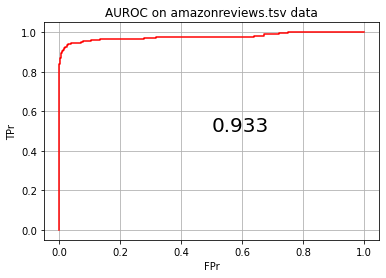

In [46]:
plt.plot(fpr , tpr , color = "r")
plt.xlabel("FPr")
plt.ylabel("TPr")
plt.title("AUROC on amazonreviews.tsv data")
plt.text(x = 0.5 , y = 0.5, s = area_auroc_ , size = 20)
plt.grid()

# 2) Decision Tree

# Grid search

In [47]:
from sklearn.model_selection import GridSearchCV

In [48]:
from sklearn.tree import DecisionTreeClassifier
dtc = DecisionTreeClassifier()

In [49]:
search_dict = {"criterion" : ('entropy' , 'gini'),
              "max_depth" : ( 3,4,5,6,7,8,9 ,10, 12),
              "min_samples_split": (25, 50 , 75, 100 ,150,200)}

In [50]:
grid_dt = GridSearchCV(dtc , param_grid= search_dict)

In [51]:
grid_dt.fit(x_train, y_train)

GridSearchCV(estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ('entropy', 'gini'),
                         'max_depth': (3, 4, 5, 6, 7, 8, 9, 10, 12),
                         'min_samples_split': (25, 50, 75, 100, 150, 200)})

In [52]:
grid_dt.best_params_

{'criterion': 'entropy', 'max_depth': 12, 'min_samples_split': 25}

# DT by using Grid search

In [53]:
from sklearn.tree import DecisionTreeClassifier
dtc = DecisionTreeClassifier(criterion="entropy" , max_depth = 12 , min_samples_split=25 , class_weight="balanced" )

In [54]:
dtc.fit(x_train , y_train)

DecisionTreeClassifier(class_weight='balanced', criterion='entropy',
                       max_depth=12, min_samples_split=25)

In [55]:
pred_dtc = dtc.predict(x_test)
pred_dtc

array([0, 0, 1, ..., 0, 1, 0], dtype=int64)

In [56]:
tab_dtc = confusion_matrix(pred_dtc , y_test)
tab_dtc

array([[1108,   24],
       [  69,  155]], dtype=int64)

In [57]:
print(classification_report( y_test , pred_dtc))

              precision    recall  f1-score   support

           0       0.98      0.94      0.96      1177
           1       0.69      0.87      0.77       179

    accuracy                           0.93      1356
   macro avg       0.84      0.90      0.86      1356
weighted avg       0.94      0.93      0.93      1356



# 3) DT with ADA-BOOST

In [58]:
from sklearn.ensemble import AdaBoostClassifier
abc_dtc = AdaBoostClassifier(dtc , n_estimators=25)

In [59]:
abc_dtc.fit(x_train , y_train)

AdaBoostClassifier(base_estimator=DecisionTreeClassifier(class_weight='balanced',
                                                         criterion='entropy',
                                                         max_depth=12,
                                                         min_samples_split=25),
                   n_estimators=25)

In [60]:
pred_dtc_boost = abc_dtc.predict(x_test)
pred_dtc_boost

array([0, 0, 0, ..., 0, 1, 0], dtype=int64)

In [61]:
tab_dtc_boost = confusion_matrix(pred_dtc_boost , y_test)
tab_dtc_boost 

array([[1156,   21],
       [  21,  158]], dtype=int64)

In [62]:
print(classification_report( y_test , pred_dtc_boost)) 

              precision    recall  f1-score   support

           0       0.98      0.98      0.98      1177
           1       0.88      0.88      0.88       179

    accuracy                           0.97      1356
   macro avg       0.93      0.93      0.93      1356
weighted avg       0.97      0.97      0.97      1356



# 4) Random Tree

In [63]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()

In [64]:
search_rf = {"criterion" : ('entropy' , 'gini'),
              "max_depth" : (3,4,5,6,7),
              "n_estimators": (25,50, 100 , 150, 200)}

In [65]:
grid_rf = GridSearchCV(rf , param_grid= search_rf)

In [66]:
grid_rf.fit(x_train , y_train)

GridSearchCV(estimator=RandomForestClassifier(),
             param_grid={'criterion': ('entropy', 'gini'),
                         'max_depth': (3, 4, 5, 6, 7),
                         'n_estimators': (25, 50, 100, 150, 200)})

In [67]:
grid_rf.best_params_

{'criterion': 'gini', 'max_depth': 7, 'n_estimators': 50}

# RF by using Grid search

In [68]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(criterion= 'gini', max_depth= 7 , n_estimators= 50 , class_weight="balanced")

In [69]:
rf.fit(x_train , y_train)

RandomForestClassifier(class_weight='balanced', max_depth=7, n_estimators=50)

In [70]:
pred_rfc = rf.predict(x_test)
pred_rfc

array([0, 0, 0, ..., 0, 1, 0], dtype=int64)

In [71]:
tab_rfc = confusion_matrix(pred_rfc , y_test)
tab_rfc

array([[1170,   39],
       [   7,  140]], dtype=int64)

In [72]:
print(classification_report( y_test , pred_rfc))  

              precision    recall  f1-score   support

           0       0.97      0.99      0.98      1177
           1       0.95      0.78      0.86       179

    accuracy                           0.97      1356
   macro avg       0.96      0.89      0.92      1356
weighted avg       0.97      0.97      0.96      1356



# 5) RF with ADA-BOOST

In [73]:
from sklearn.ensemble import AdaBoostClassifier
abc_rfc = AdaBoostClassifier(rf)

In [74]:
abc_rfc.fit(x_train , y_train)

AdaBoostClassifier(base_estimator=RandomForestClassifier(class_weight='balanced',
                                                         max_depth=7,
                                                         n_estimators=50))

In [75]:
pred_rfc_boost = abc_rfc.predict(x_test)
pred_rfc_boost

array([0, 0, 0, ..., 0, 1, 0], dtype=int64)

In [76]:
tab_rfc_boost = confusion_matrix(pred_rfc_boost , y_test)
tab_rfc_boost

array([[1167,   20],
       [  10,  159]], dtype=int64)

In [77]:
print(classification_report( y_test , pred_rfc_boost))

              precision    recall  f1-score   support

           0       0.98      0.99      0.99      1177
           1       0.94      0.89      0.91       179

    accuracy                           0.98      1356
   macro avg       0.96      0.94      0.95      1356
weighted avg       0.98      0.98      0.98      1356



# 6) Naive Bayes

In [78]:
from sklearn.naive_bayes import MultinomialNB
naive_bays = MultinomialNB()

In [79]:
nb = naive_bays.fit(x_train , y_train)

In [80]:
pred_nb = nb.predict(x_test)
pred_nb 

array([0, 1, 0, ..., 0, 1, 0], dtype=int64)

In [81]:
tab_nb = confusion_matrix(pred_nb , y_test)
tab_nb

array([[1153,   13],
       [  24,  166]], dtype=int64)

In [82]:
print(classification_report(y_test , pred_nb))

              precision    recall  f1-score   support

           0       0.99      0.98      0.98      1177
           1       0.87      0.93      0.90       179

    accuracy                           0.97      1356
   macro avg       0.93      0.95      0.94      1356
weighted avg       0.97      0.97      0.97      1356



# 7) KNN 

In [83]:
x=list(range(1,51))
acc_y = []
for k in x:
    from sklearn.neighbors import KNeighborsClassifier
    kn = KNeighborsClassifier(n_neighbors=k)
    kn.fit(x_train , y_train)
    pred_kn = kn.predict(x_test)
    pred_kn
    tab_kn = confusion_matrix(pred_kn , y_test)
    tab_kn
    Acc = tab_kn.diagonal().sum()* 100 / tab_kn.sum()
    acc_y.append(Acc)

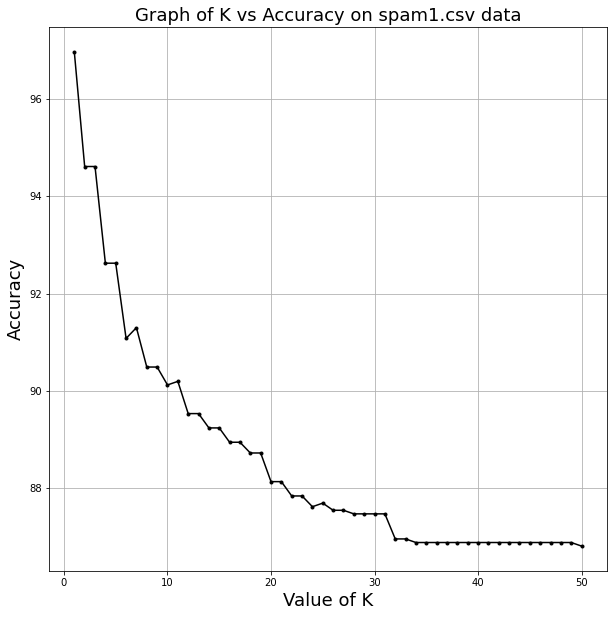

In [84]:
plt.figure(figsize=(10,10))
plt.plot(x , acc_y , "." , linestyle='-' , c="black" )
plt.xlabel("Value of K",fontsize=18)
plt.ylabel("Accuracy", fontsize=18)
plt.title("Graph of K vs Accuracy on spam1.csv data" , fontsize=18)
plt.grid()

In [ ]:
# here i  decide value of K by using trade of between accuracy & stability 
# the region were more stable model then i choose that point as a value of K
# so for this model i decide value ok K = 35 because between 32 to 50 model looks more stable 

# k=35

In [85]:
from sklearn.neighbors import KNeighborsClassifier

In [86]:
knn = KNeighborsClassifier(n_neighbors= 35)

In [87]:
knn.fit(x_train , y_train)

KNeighborsClassifier(n_neighbors=35)

In [88]:
pred_knn = knn.predict(x_test)
pred_knn

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [89]:
tab_knn = confusion_matrix(pred_knn , y_test)
tab_knn

array([[1177,  178],
       [   0,    1]], dtype=int64)

In [90]:
print(classification_report(y_test , pred_knn))

              precision    recall  f1-score   support

           0       0.87      1.00      0.93      1177
           1       1.00      0.01      0.01       179

    accuracy                           0.87      1356
   macro avg       0.93      0.50      0.47      1356
weighted avg       0.89      0.87      0.81      1356



# k=82

In [91]:
messages_bow.shape

(6776, 9422)

In [92]:
k=np.sqrt(messages_bow.shape[0])
k

82.3164625090267

In [93]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors= 82)

In [94]:
knn.fit(x_train , y_train)

KNeighborsClassifier(n_neighbors=82)

In [95]:
pred_knn = knn.predict(x_test)
pred_knn

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [96]:
tab_knn = confusion_matrix(pred_knn , y_test)
tab_knn

array([[1177,  179],
       [   0,    0]], dtype=int64)

In [97]:
print(classification_report(y_test , pred_knn))

              precision    recall  f1-score   support

           0       0.87      1.00      0.93      1177
           1       0.00      0.00      0.00       179

    accuracy                           0.87      1356
   macro avg       0.43      0.50      0.46      1356
weighted avg       0.75      0.87      0.81      1356



C:\Users\DELL\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\DELL\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\DELL\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


# 8) SVM 

In [110]:
from sklearn.model_selection import GridSearchCV

In [111]:
search_dict = {"kernel" : ('linear', 'poly' , 'rbf', 'sigmoid')}

In [112]:
from sklearn.svm import SVC
svc_model = SVC()

In [113]:
grid_svc = GridSearchCV(svc_model , param_grid= search_dict)

In [114]:
grid_svc.fit(x_train , y_train)

GridSearchCV(estimator=SVC(),
             param_grid={'kernel': ('linear', 'poly', 'rbf', 'sigmoid')})

In [115]:
grid_svc.best_params_    

{'kernel': 'linear'}

# SVM by using Grid Search

In [98]:
from sklearn.svm import SVC

In [99]:
svm_best = SVC(kernel ='linear')

In [100]:
svm_best.fit(x_train , y_train)

SVC(kernel='linear')

In [101]:
pred_svm = svm_best.predict(x_test)
pred_svm

array([0, 0, 0, ..., 0, 1, 0], dtype=int64)

In [102]:
tab_svm = confusion_matrix(pred_svm , y_test)
tab_svm 

array([[1173,   22],
       [   4,  157]], dtype=int64)

In [103]:
print(classification_report(y_test , pred_svm))

              precision    recall  f1-score   support

           0       0.98      1.00      0.99      1177
           1       0.98      0.88      0.92       179

    accuracy                           0.98      1356
   macro avg       0.98      0.94      0.96      1356
weighted avg       0.98      0.98      0.98      1356



## WORDCLOUD

#! pip install wordcloud

In [104]:
from wordcloud import WordCloud

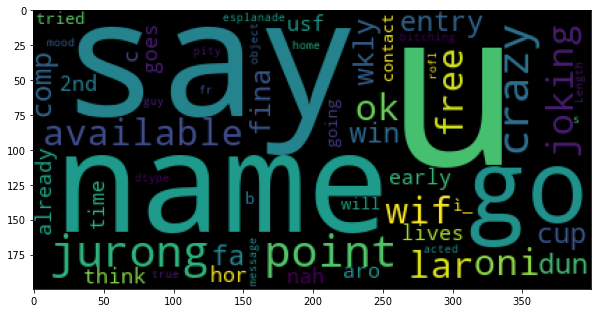

In [105]:
cloud = WordCloud().generate(str(messages['message']))
plt.figure(figsize=(10,10))
plt.imshow(cloud)  

In [ ]:
# Here I craete a separate df on ham & spam & then plot it  

In [107]:
df_ham = messages[messages.label==0]
df_spam = messages[messages.label==1]

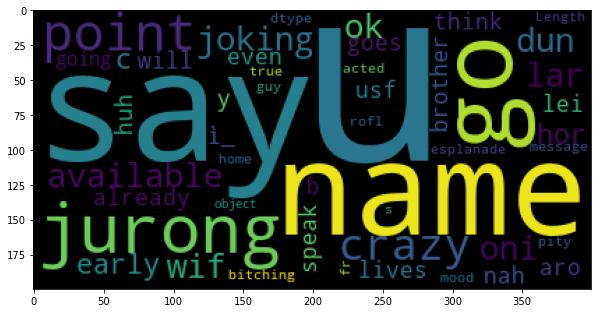

In [108]:
cloud = WordCloud().generate(str(df_ham['message']))
plt.figure(figsize=(10,10))
plt.imshow(cloud)  

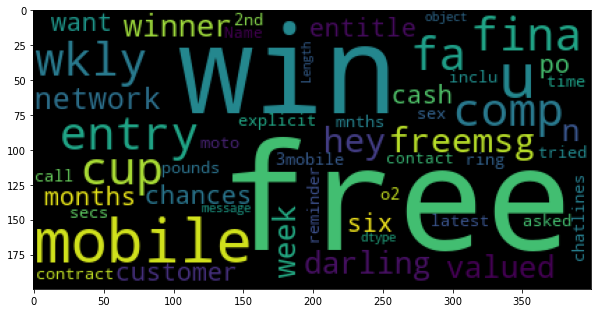

In [109]:
cloud = WordCloud().generate(str(df_spam['message']))
plt.figure(figsize=(10,10))
plt.imshow(cloud)